In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from io import StringIO

For CSV File

In [7]:
df = pd.read_csv('line_chart_line_chart.csv', delimiter=';', parse_dates=['Timestamp'])
df['Time'] = df['Timestamp'].dt.strftime('%H:%M')
print(df.head(200))

             Timestamp   Batttery  FREE_HEAP  MIN_FREE_HEAP   Time
0  2025-03-21 11:33:57  23.433333  56.795333      48.425333  11:33
1  2025-03-21 12:03:57  23.517999  56.716800      48.352000  12:03
2  2025-03-21 12:33:57  23.625000  56.738667      48.352000  12:33
3  2025-03-21 13:03:57  23.715000  56.928000      48.352000  13:03
4  2025-03-21 13:33:57  23.806667  56.929333      48.352000  13:33
..                 ...        ...        ...            ...    ...
91 2025-03-23 09:03:57  27.570000  86.249333      74.096000  09:03
92 2025-03-23 09:33:57  27.570000  86.176000      74.096000  09:33
93 2025-03-23 10:03:57  27.563333  85.613333      74.096000  10:03
94 2025-03-23 10:33:57  27.559999  86.232000      74.096000  10:33
95 2025-03-23 11:03:57  27.566666  85.681333      74.096000  11:03

[96 rows x 5 columns]


In [8]:
# Filter for March 22 and time from 11:00 onwards
df_filtered = df[(df['Timestamp'].dt.strftime('%m-%d') == '03-22') & (df['Time'] >= '12:00')]

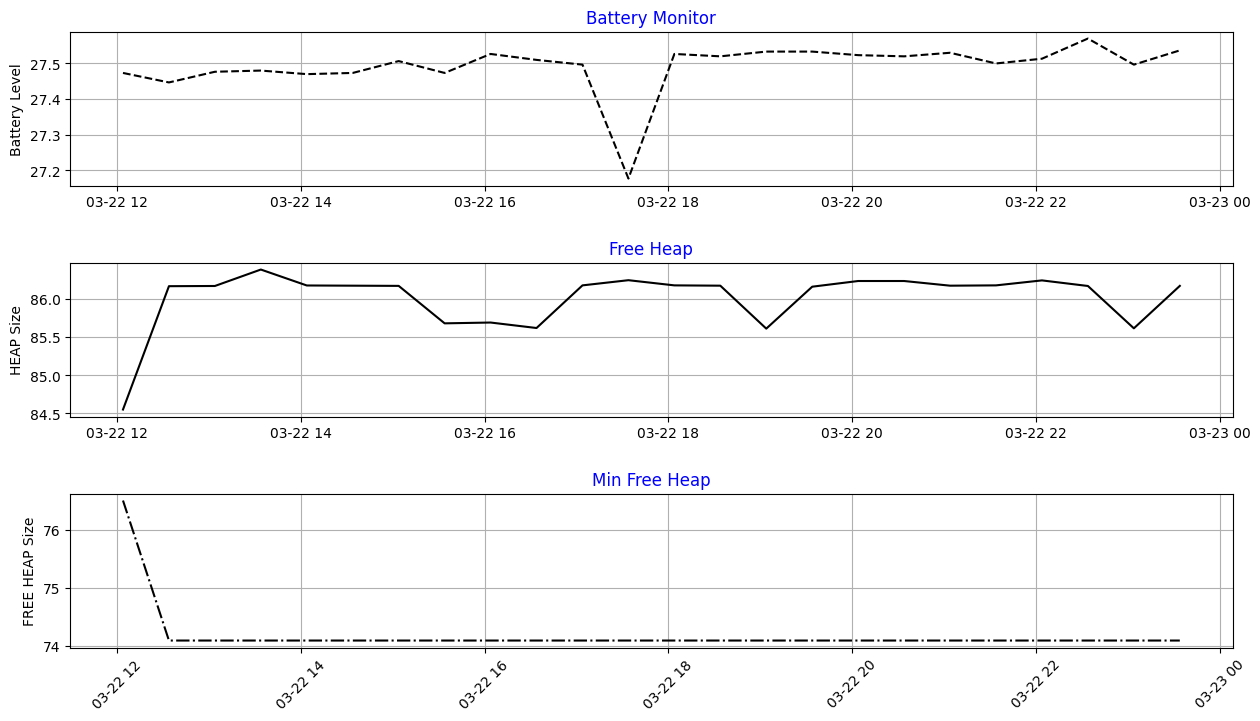

In [10]:
# Create subplots for each parameter
fig, axes = plt.subplots(3, 1, figsize=(15, 8))
# Adjust layout spacing
plt.subplots_adjust(hspace=0.5)

axes[0].plot(df_filtered['Timestamp'], df_filtered['Batttery'], linestyle='--', color='black')
axes[0].set_title('Battery Monitor',color='blue')
axes[0].set_ylabel('Battery Level')
axes[0].grid(True)

axes[1].plot(df_filtered['Timestamp'], df_filtered['FREE_HEAP'], linestyle='-', color='black')
axes[1].set_title('Free Heap',color='blue')
axes[1].set_ylabel('HEAP Size')
axes[1].grid(True)

axes[2].plot(df_filtered['Timestamp'], df_filtered['MIN_FREE_HEAP'], linestyle='-.', color='black')
axes[2].set_title('Min Free Heap', color='blue')
axes[2].set_ylabel('FREE HEAP Size')
axes[2].grid(True)

plt.xticks(rotation=45)
plt.show()


For XLSX File

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from io import StringIO

In [4]:
df = pd.read_excel('line_chart_line_chart.xlsx')

# Convert the timestamp column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Filter data from "03-22 12 PM" onward
start_time = pd.Timestamp("2025-03-22 12:00:00")
df_filtered = df[df['Timestamp'] >= start_time]

In [6]:
a = df_filtered['FREE_HEAP'].mean()

C:\Users\ASUS VIVOBOOK\AppData\Local\Temp\ipykernel_16308\2633472985.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[2].legend()


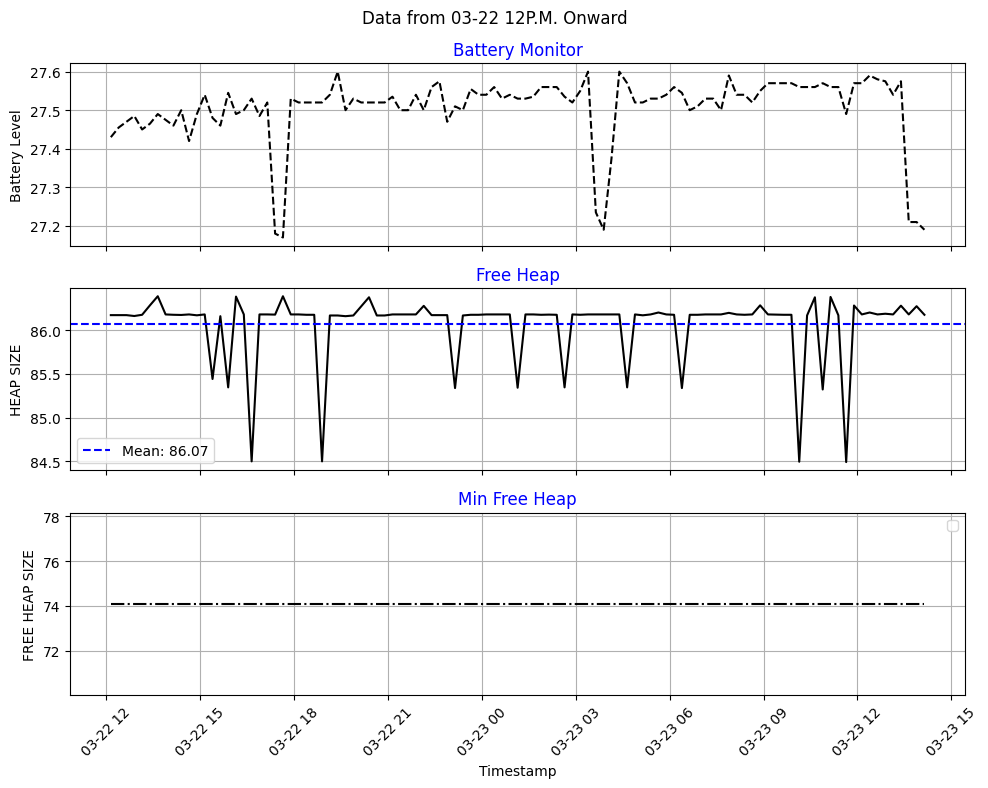

In [30]:
fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

columns_to_plot = df_filtered.select_dtypes(include='number').columns[:3]

axes[0].plot(df_filtered['Timestamp'], df_filtered['Batttery'], linestyle='--', color='black')
axes[0].set_title('Battery Monitor',color='blue')
axes[0].set_ylabel('Battery Level')
axes[0].grid(True)

axes[1].plot(df_filtered['Timestamp'], df_filtered['FREE_HEAP'], linestyle='solid', color='black')
axes[1].set_title('Free Heap',color='blue')
axes[1].set_ylabel('HEAP SIZE')
axes[1].grid(True)


free_heap_mean = df_filtered['FREE_HEAP'].mean()
axes[1].axhline(y=free_heap_mean, color='blue', linestyle='--', label=f'Mean: {free_heap_mean:.2f}')
axes[1].legend()

axes[2].plot(df_filtered['Timestamp'], df_filtered['MIN_FREE_HEAP'], linestyle='-.', color='black')
axes[2].set_title('Min Free Heap', color='blue')
axes[2].set_ylabel('FREE HEAP SIZE')
axes[2].grid(True)
axes[2].legend()

# Formatting
plt.xlabel("Timestamp")
plt.xticks(rotation=45)
plt.suptitle("Data from 03-22 12P.M. Onward")
plt.tight_layout()
plt.show()